### Data Gathering, Cleaning, & Setup

In [ ]:
#!pip install joypy

In [76]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull
import functools
import seaborn as sns

In [51]:
#Imports and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.cluster.hierarchy as shc
import joypy


desert = "./Priya's Resources/Food Deserts/food_access_research_atlas.csv"
variable = "./Priya's Resources/Food Deserts/food_access_variable_lookup.csv"
farmers_market = "./Priya's Resources/Farmers Markets/farmers_markets_from_usda.csv"
county_info = "./Priya's Resources/Farmers Markets/wiki_county_info.csv" 
file_worldwide = "./Kasy-Resources/worldwide-sbux-locations.csv"
file_mcd = "./Kasy-Resources/mcdonalds_locations.csv"
sbux_nutrition = "./Kasy-Resources/starbucks-menu-nutrition-drinks.csv"
mcd_nutrition = "./Kasy-Resources/mcd_nutrition.csv"
subway_nutrition = "./Kasy-Resources/subway_nutrition.csv"
city_population = "./Yash's Resources/uscitypopdensity.csv"


sbux_df = pd.read_csv(file_worldwide)
sbux_nutrition_df = pd.read_csv(sbux_nutrition)
mcd_nutrition_df = pd.read_csv(mcd_nutrition)
subway_nutrition_df = pd.read_csv(subway_nutrition)
city_population = pd.read_csv(city_population)
desert_df = pd.read_csv(desert)
desert_var = pd.read_csv(variable)
farmers_df = pd.read_csv(farmers_market)
county_df = pd.read_csv(county_info)






In [7]:
sbux_df.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [8]:
sbux_df['Country'].value_counts()

US    13608
CN     2734
CA     1468
JP     1237
KR      993
      ...  
AW        3
ZA        3
MC        2
LU        2
AD        1
Name: Country, Length: 73, dtype: int64

In [9]:
# to get US only locations

sbd1 = sbux_df.loc[sbux_df['Country']=='US',:]
sbd1['State/Province'].value_counts()

CA    2821
TX    1042
WA     757
FL     694
NY     645
IL     575
AZ     488
CO     481
VA     432
OH     378
OR     359
PA     357
NC     338
GA     326
MI     283
MA     273
NJ     261
MD     257
NV     253
IN     221
MO     188
MN     184
TN     180
WI     145
SC     131
CT     123
KY     116
UT     101
HI      99
KS      94
DC      91
IA      89
AL      85
LA      84
OK      79
NM      76
ID      67
NE      58
AR      55
AK      49
MT      36
MS      32
ME      30
NH      29
RI      27
WV      25
SD      25
DE      25
WY      23
ND      13
VT       8
Name: State/Province, dtype: int64

In [10]:
# to group them by state

sbd2 = sbd1.groupby(["State/Province"]).count().reset_index()
sbd2.head()

,State/Province,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,AK,49,49,49,49,49,49,49,49,41,49,49,49
1,AL,85,85,85,85,85,85,85,85,83,85,85,85
2,AR,55,55,55,55,55,55,55,55,53,55,55,55
3,AZ,488,488,488,488,488,488,488,488,474,488,488,488
4,CA,2821,2821,2821,2821,2821,2821,2821,2821,2767,2821,2821,2821


In [14]:
#data for states and their codes

states = "./Yash's Resources/csvData.csv"
state = pd.read_csv(states)
state.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [15]:
#merging to get state names
sbd3 = pd.merge(sbd2, state, how='left', left_on='State/Province', right_on='Code')
sbd3.head()

,State/Province,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,State,Abbrev,Code
0,AK,49,49,49,49,49,49,49,49,41,49,49,49,Alaska,Alaska,AK
1,AL,85,85,85,85,85,85,85,85,83,85,85,85,Alabama,Ala.,AL
2,AR,55,55,55,55,55,55,55,55,53,55,55,55,Arkansas,Ark.,AR
3,AZ,488,488,488,488,488,488,488,488,474,488,488,488,Arizona,Ariz.,AZ
4,CA,2821,2821,2821,2821,2821,2821,2821,2821,2767,2821,2821,2821,California,Calif.,CA


In [ ]:
#to save file as csv

sbd3.to_csv(r'.\sbdstates.csv', index = False)

In [16]:
#to ensure data accuracy

sbd3["State"].value_counts()

Pennsylvania            1
Alabama                 1
Kentucky                1
Nebraska                1
Rhode Island            1
Wyoming                 1
Michigan                1
Colorado                1
Oklahoma                1
Missouri                1
New York                1
Illinois                1
Arkansas                1
Wisconsin               1
Texas                   1
Arizona                 1
Virginia                1
Idaho                   1
South Carolina          1
North Carolina          1
North Dakota            1
New Jersey              1
New Mexico              1
South Dakota            1
Alaska                  1
Minnesota               1
West Virginia           1
Ohio                    1
Georgia                 1
Hawaii                  1
Maine                   1
District of Columbia    1
Mississippi             1
New Hampshire           1
Nevada                  1
Tennessee               1
Utah                    1
Delaware                1
Florida     

In [17]:
#to get fast food data

fast = "./Yash's Resources/FastFoodRestaurants.csv"
fastdf = pd.read_csv(fast)
fastdf.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [18]:
fastdf.name.value_counts()

McDonald's                    1886
Burger King                   1154
Taco Bell                      873
Wendy's                        731
Arby's                         518
                              ... 
Nino's Pizza                     1
ShopRite                         1
Red Robin Gourmet Burgers        1
Kings Contrivance Jewelers       1
Mcalister's Deli                 1
Name: name, Length: 548, dtype: int64

In [19]:
fast1 = fastdf.loc[fastdf["name"]=="McDonald's"]
fast1.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.00598,-81.770400,McDonald's,29138,SC,http://www.mcdonalds.com
12,1535 NW 50th St,Oklahoma City,US,us/ok/oklahomacity/1535nw50thst/-1161002137,35.52234,-97.538200,McDonald's,73118,OK,"http://mcdonalds.com,http://www.mcdonalds.com/..."
15,301 University Blvd,Louisville,US,us/ky/louisville/301universityblvd/-1161002137,38.21999,-85.764824,McDonald's,40208,KY,"http://mcdonalds.com,http://www.mcdonalds.com/..."


In [20]:
fast1.province.value_counts()

TX    144
CA    121
OH    102
IN     82
FL     81
IL     76
MO     71
KY     71
VA     66
NY     64
NC     63
PA     62
LA     55
GA     52
OK     50
MI     44
SC     42
WA     39
TN     39
IA     37
NJ     37
WI     35
AL     34
CT     33
MD     32
AZ     32
MN     27
UT     27
AR     25
MA     24
OR     23
CO     19
WV     18
SD     17
VT     16
NV     15
NM     15
ID     14
ME     12
MS     10
NE     10
KS     10
NH      9
ND      7
DE      6
WY      5
DC      4
MT      3
RI      3
AK      2
HI      1
Name: province, dtype: int64

In [21]:
mcd1 = pd.merge(fast1, state, how='left', left_on='province', right_on='Code')
mcd1.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,State,Abbrev,Code
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.890210,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,N.Y.,NY
1,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.845530,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,N.Y.,NY
2,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.00598,-81.770400,McDonald's,29138,SC,http://www.mcdonalds.com,South Carolina,S.C.,SC
3,1535 NW 50th St,Oklahoma City,US,us/ok/oklahomacity/1535nw50thst/-1161002137,35.52234,-97.538200,McDonald's,73118,OK,"http://mcdonalds.com,http://www.mcdonalds.com/...",Oklahoma,Okla.,OK
4,301 University Blvd,Louisville,US,us/ky/louisville/301universityblvd/-1161002137,38.21999,-85.764824,McDonald's,40208,KY,"http://mcdonalds.com,http://www.mcdonalds.com/...",Kentucky,Ky.,KY


In [22]:
mcd1['State'].value_counts()

Texas                   144
California              121
Ohio                    102
Indiana                  82
Florida                  81
Illinois                 76
Missouri                 71
Kentucky                 71
Virginia                 66
New York                 64
North Carolina           63
Pennsylvania             62
Louisiana                55
Georgia                  52
Oklahoma                 50
Michigan                 44
South Carolina           42
Washington               39
Tennessee                39
Iowa                     37
New Jersey               37
Wisconsin                35
Alabama                  34
Connecticut              33
Maryland                 32
Arizona                  32
Utah                     27
Minnesota                27
Arkansas                 25
Massachusetts            24
Oregon                   23
Colorado                 19
West Virginia            18
South Dakota             17
Vermont                  16
Nevada              

In [23]:
mcd2 = mcd1.groupby(["State"]).count().reset_index()
mcd2.head()

,State,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,Abbrev,Code
0,Alabama,34,34,34,34,34,34,34,34,34,34,34,34
1,Alaska,2,2,2,2,2,2,2,2,2,2,2,2
2,Arizona,32,32,32,32,32,32,32,32,32,32,32,32
3,Arkansas,25,25,25,25,25,25,25,25,25,25,25,25
4,California,121,121,121,121,121,121,121,121,121,117,121,121


In [24]:
mcd2.to_csv(r'.\mcdstates.csv', index = False)

In [25]:
#used this data below to get all fastfoods, not just McDs

mcd3 = pd.merge(fastdf, state, how='left', left_on='province', right_on='Code')
mcd3.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,State,Abbrev,Code
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,N.Y.,NY
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com,Ohio,Ohio,OH
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",Kentucky,Ky.,KY
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",New York,N.Y.,NY
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",Ohio,Ohio,OH


In [26]:
mcd4 = mcd3.groupby(["State"]).count().reset_index()
mcd4.head()

,State,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,Abbrev,Code
0,Alabama,236,236,236,236,236,236,236,236,236,226,236,236
1,Alaska,14,14,14,14,14,14,14,14,14,13,14,14
2,Arizona,208,208,208,208,208,208,208,208,208,198,208,208
3,Arkansas,151,151,151,151,151,151,151,151,151,145,151,151
4,California,676,676,676,676,676,676,676,676,676,618,676,676


In [ ]:
#File used for final analysis

mcd4.to_csv(r'.\faststates.csv', index = False)

In [32]:
city_population.reset_index()


##TO DO - remove double index


,index,Index,City,State,Population Density (Persons/Square Mile),2016 Population,Land Area (Square Miles)
0,0,1,New York,New York,28211,8537673,303
1,1,2,Los Angeles,California,8484,3976322,469
2,2,3,Chicago,Illinois,11883,2704958,228
3,3,4,Houston,Texas,3842,2303482,600
4,4,5,Phoenix,Arizona,3126,1615017,517
...,...,...,...,...,...,...,...
749,749,750,Cerritos,California,5791,50555,9
750,750,751,Galveston,Texas,1226,50550,41
751,751,752,Coeur d'Alene,Idaho,3230,50285,16
752,752,753,Lakewood,Ohio,9092,50279,6


In [34]:
uscitiesdata = "./Yash's Resources/uscities.csv"
uscities = pd.read_csv(uscitiesdata)
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [35]:
#getting sense of the data and calculating key variables

state = "CA"
county = "Santa Clara"

county_info = desert_df.loc[(desert_df["State"]== "California") & (desert_df["County"]== county) ,:]
county_info["POP2010"].sum()
county_info["OHU2010"].sum()


604204

In [36]:
county_info2 = desert_df.loc[(desert_df["State"]== "California") & (desert_df["County"]== county) & (desert_df["LAPOP1_10"]!= 0) ,:]
l = county_info2["LAPOP1_10"].sum()
p = county_info["POP2010"].sum()
l/p  # ratio of population in food desert to total population

0.08307530035824817

In [37]:
desert_df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [38]:
l

148010.44428087

In [40]:
desertdf1 = desert_df
desertdf1["State.County"] = desertdf1["State"] + "-"+desertdf1["County"]
desertdf2 = desertdf1.groupby(["State.County"]).sum().reset_index()
desertdf2

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,6546,42855,9643,474,32,232,1335,1310,1081,2682
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,30568,156153,17105,1348,89,1216,6354,7992,2242,6471
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,3909,13180,12875,107,29,114,1152,1387,802,2097
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,2906,17381,5047,22,13,64,388,406,299,1125
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,8439,53068,761,117,38,307,3031,4626,823,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,3643,38748,438,336,42,423,3819,6689,628,835
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,2098,18821,49,235,15,111,2063,3191,143,128
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,1874,19514,55,61,36,168,1284,1855,264,621
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,1508,7795,22,48,1,93,574,1162,252,337


In [41]:
county_info2["POP2010"].sum()

553073

In [42]:
desertdf2["State.County"].value_counts()

Iowa-Buchanan          1
Colorado-Fremont       1
South Dakota-Turner    1
Virginia-Carroll       1
Colorado-Teller        1
                      ..
Arkansas-Woodruff      1
California-Tehama      1
Alabama-Escambia       1
Alabama-Clarke         1
Arkansas-Newton        1
Name: State.County, Length: 3141, dtype: int64

In [43]:
desertdf2

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,6546,42855,9643,474,32,232,1335,1310,1081,2682
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,30568,156153,17105,1348,89,1216,6354,7992,2242,6471
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,3909,13180,12875,107,29,114,1152,1387,802,2097
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,2906,17381,5047,22,13,64,388,406,299,1125
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,8439,53068,761,117,38,307,3031,4626,823,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,3643,38748,438,336,42,423,3819,6689,628,835
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,2098,18821,49,235,15,111,2063,3191,143,128
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,1874,19514,55,61,36,168,1284,1855,264,621
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,1508,7795,22,48,1,93,574,1162,252,337


In [44]:
#adding two new columns

desertdf3 = desertdf2
desertdf3["Desert vs POP"] = (desertdf2["LAPOP1_10"]/desertdf2["POP2010"])*100
desertdf3["Desert vs OHU"] = (desertdf2["LAPOP1_10"]/desertdf2["OHU2010"])*100
desertdf3

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,9643,474,32,232,1335,1310,1081,2682,33.154352,89.474612
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,17105,1348,89,1216,6354,7992,2242,6471,25.457631,63.405781
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,12875,107,29,114,1152,1387,802,2097,24.343430,68.064926
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,5047,22,13,64,388,406,299,1125,1.290048,3.717018
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,761,117,38,307,3031,4626,823,2900,10.215867,27.138470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,438,336,42,423,3819,6689,628,835,21.458798,57.057608
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,49,235,15,111,2063,3191,143,128,17.429217,41.361613
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,55,61,36,168,1284,1855,264,621,3.592643,9.894292
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,22,48,1,93,574,1162,252,337,12.390091,30.276245


In [45]:
new = desertdf3["State.County"].str.split("-", n = 1, expand = True) 
desertdf4 = desertdf3 
# making separate first name column from new data frame 
desertdf4["State"]= new[0] 
  
desertdf4 

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU,State
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,474,32,232,1335,1310,1081,2682,33.154352,89.474612,Alabama
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,1348,89,1216,6354,7992,2242,6471,25.457631,63.405781,Alabama
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,107,29,114,1152,1387,802,2097,24.343430,68.064926,Alabama
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,22,13,64,388,406,299,1125,1.290048,3.717018,Alabama
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,117,38,307,3031,4626,823,2900,10.215867,27.138470,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,336,42,423,3819,6689,628,835,21.458798,57.057608,Wyoming
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,235,15,111,2063,3191,143,128,17.429217,41.361613,Wyoming
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,61,36,168,1284,1855,264,621,3.592643,9.894292,Wyoming
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,48,1,93,574,1162,252,337,12.390091,30.276245,Wyoming


In [48]:
desertdf5 = desert_df.groupby(["State"]).sum().reset_index()
desertdf5

,State,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama,1268834272385,644,4779736,1883791,4,115816,29.739938,246,387,...,657792,3275394,1251311,53595,3057,28218,168161,185602,119315,291592
1,Alaska,351542086585,85,710231,258058,1,26352,7.394096,34,48,...,54938,473576,23263,38135,7409,104871,62977,39249,24148,26130
2,Arizona,6126991377194,1293,6392017,2380990,16,139384,31.001931,258,564,...,881831,4667121,259008,176695,12648,296529,980016,1895149,163479,323640
3,Arkansas,3484080853747,335,2915918,1147084,1,78931,18.806666,177,247,...,419981,2245229,449895,36102,5863,22248,156581,186050,72003,167466
4,California,48705669364530,7352,37253956,12577498,67,819816,185.229939,542,2195,...,4246514,21453934,2299072,4861007,144386,362801,8132756,14013719,984852,1102588
5,Colorado,10050504751914,977,5029196,1972868,13,115878,32.019217,180,419,...,549625,4089202,201737,139028,6623,56010,536596,1038687,114782,171194
6,Connecticut,7492871977935,706,3574097,1371087,8,118152,28.011591,70,203,...,506559,2772410,362296,135565,1428,11256,291142,479087,123437,157477
7,Delaware,2180705461177,170,897934,342297,0,24413,5.174522,27,55,...,129277,618617,191814,28549,400,4181,54373,73221,21841,43114
8,District of Columbia,1969180078485,179,601723,266707,3,40021,10.380114,6,52,...,68809,231471,305125,21056,302,2079,41690,54749,96855,37777
9,Florida,50870329497024,3627,18801310,7420802,22,421709,98.609079,582,1301,...,3259602,14109162,2999862,454821,12286,71458,1153721,4223806,512040,1032766


In [49]:
desertdf5["Desert vs POP"] = (desertdf5["LAPOP1_10"]/desertdf5["POP2010"])*100
desertdf5["Desert vs OHU"] = (desertdf5["LAPOP1_10"]/desertdf5["OHU2010"])*100
desertdf5

,State,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
0,Alabama,1268834272385,644,4779736,1883791,4,115816,29.739938,246,387,...,1251311,53595,3057,28218,168161,185602,119315,291592,24.236327,61.494744
1,Alaska,351542086585,85,710231,258058,1,26352,7.394096,34,48,...,23263,38135,7409,104871,62977,39249,24148,26130,34.159455,94.014152
2,Arizona,6126991377194,1293,6392017,2380990,16,139384,31.001931,258,564,...,259008,176695,12648,296529,980016,1895149,163479,323640,26.207767,70.357494
3,Arkansas,3484080853747,335,2915918,1147084,1,78931,18.806666,177,247,...,449895,36102,5863,22248,156581,186050,72003,167466,23.963979,60.917070
4,California,48705669364530,7352,37253956,12577498,67,819816,185.229939,542,2195,...,2299072,4861007,144386,362801,8132756,14013719,984852,1102588,13.386560,39.650359
5,Colorado,10050504751914,977,5029196,1972868,13,115878,32.019217,180,419,...,201737,139028,6623,56010,536596,1038687,114782,171194,22.635397,57.701705
6,Connecticut,7492871977935,706,3574097,1371087,8,118152,28.011591,70,203,...,362296,135565,1428,11256,291142,479087,123437,157477,29.804450,77.693098
7,Delaware,2180705461177,170,897934,342297,0,24413,5.174522,27,55,...,191814,28549,400,4181,54373,73221,21841,43114,25.435873,66.724905
8,District of Columbia,1969180078485,179,601723,266707,3,40021,10.380114,6,52,...,305125,21056,302,2079,41690,54749,96855,37777,2.118816,4.780304
9,Florida,50870329497024,3627,18801310,7420802,22,421709,98.609079,582,1301,...,2999862,454821,12286,71458,1153721,4223806,512040,1032766,25.695831,65.102841


In [61]:
desertdf3["Desert vs POP"].describe()

count    3141.000000
mean       25.203356
std        20.131432
min         0.000000
25%        11.830846
50%        21.586016
75%        32.665332
max       100.000001
Name: Desert vs POP, dtype: float64

In [62]:
desertdf5["Desert vs POP"].describe()

count    51.000000
mean     23.971873
std       5.898535
min       2.118816
25%      21.358904
50%      25.312123
75%      27.144622
max      34.264193
Name: Desert vs POP, dtype: float64

In [64]:
desertdf5  = desertdf3.sort_values(["Desert vs OHU"]).reset_index()
desertdf5.loc[desertdf5["State.County"]  == "California-Santa Clara",:]

,index,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU,State
609,226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,...,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767,California


In [65]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [66]:
farmers_df["State"].value_counts()

California              760
New York                673
Michigan                343
Illinois                338
Ohio                    336
Massachusetts           326
Pennsylvania            312
Wisconsin               311
Florida                 264
Virginia                263
Missouri                256
North Carolina          255
Texas                   236
Iowa                    227
Minnesota               203
Indiana                 201
Washington              176
Georgia                 169
Maryland                165
Colorado                161
Oregon                  160
Connecticut             158
New Jersey              156
Alabama                 140
Kentucky                140
South Carolina          133
Tennessee               133
Kansas                  120
Arkansas                111
Nebraska                105
Maine                    96
New Hampshire            96
Hawaii                   96
West Virginia            94
Arizona                  93
Vermont             

In [67]:
farmers1 = farmers_df.groupby(["State"]).count().reset_index()
farmers1.head()

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,Alabama,140,140,40,38,9,1,5,135,138,...,80,80,80,80,80,80,80,80,80,140
1,Alaska,37,37,21,17,5,0,1,37,37,...,25,25,25,25,25,25,25,25,25,37
2,Arizona,93,93,69,54,24,3,15,92,93,...,66,66,66,66,66,66,66,66,66,93
3,Arkansas,111,111,36,58,5,1,9,105,110,...,65,65,65,65,65,65,65,65,65,111
4,California,760,760,500,317,107,9,104,751,753,...,459,459,459,459,459,459,459,459,459,760


In [69]:
fasts = "./Yash's Resources/faststates.csv"
sbd = "./Yash's Resources/sbdstates.csv"

fast = pd.read_csv(fasts)
sb = pd.read_csv(sbd)

In [70]:
fast.head()

,State,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,Abbrev,Code
0,Alabama,236,236,236,236,236,236,236,236,236,226,236,236
1,Alaska,14,14,14,14,14,14,14,14,14,13,14,14
2,Arizona,208,208,208,208,208,208,208,208,208,198,208,208
3,Arkansas,151,151,151,151,151,151,151,151,151,145,151,151
4,California,676,676,676,676,676,676,676,676,676,618,676,676


In [71]:
sb.head()

,State/Province,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,State,Abbrev,Code
0,AK,49,49,49,49,49,49,49,49,41,49,49,49,Alaska,Alaska,AK
1,AL,85,85,85,85,85,85,85,85,83,85,85,85,Alabama,Ala.,AL
2,AR,55,55,55,55,55,55,55,55,53,55,55,55,Arkansas,Ark.,AR
3,AZ,488,488,488,488,488,488,488,488,474,488,488,488,Arizona,Ariz.,AZ
4,CA,2821,2821,2821,2821,2821,2821,2821,2821,2767,2821,2821,2821,California,Calif.,CA


In [72]:
farmer = farmers1[['State','FMID']]
farmer.head()

,State,FMID
0,Alabama,140
1,Alaska,37
2,Arizona,93
3,Arkansas,111
4,California,760


In [73]:
fasts = fast[['State',"keys"]]
fasts.head()

,State,keys
0,Alabama,236
1,Alaska,14
2,Arizona,208
3,Arkansas,151
4,California,676


In [74]:
sbs = sb[['State',"Brand"]]
sbs.head()

,State,Brand
0,Alaska,49
1,Alabama,85
2,Arkansas,55
3,Arizona,488
4,California,2821


In [75]:
sb.head()

,State/Province,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,State,Abbrev,Code
0,AK,49,49,49,49,49,49,49,49,41,49,49,49,Alaska,Alaska,AK
1,AL,85,85,85,85,85,85,85,85,83,85,85,85,Alabama,Ala.,AL
2,AR,55,55,55,55,55,55,55,55,53,55,55,55,Arkansas,Ark.,AR
3,AZ,488,488,488,488,488,488,488,488,474,488,488,488,Arizona,Ariz.,AZ
4,CA,2821,2821,2821,2821,2821,2821,2821,2821,2767,2821,2821,2821,California,Calif.,CA


In [77]:
dfs = [fasts,sbs,farmer ]

In [78]:
#merging dataframes for the number of starbucks, number of farmers markets, and number of fast food restaurants

counts = functools.reduce(lambda left,right: pd.merge(left,right,on='State'), dfs)
counts.head()

,State,keys,Brand,FMID
0,Alabama,236,85,140
1,Alaska,14,49,37
2,Arizona,208,488,93
3,Arkansas,151,55,111
4,California,676,2821,760


In [113]:
counts1 = counts.rename(columns={'keys':'FastFood','Brand':'Sbux','FMID':'FarmersMkt'})
counts1

,State,FastFood,Sbux,FarmersMkt
0,Alabama,236,85,140
1,Alaska,14,49,37
2,Arizona,208,488,93
3,Arkansas,151,55,111
4,California,676,2821,760
5,Colorado,158,481,161
6,Connecticut,96,123,158
7,Delaware,32,25,36
8,District of Columbia,21,91,60
9,Florida,471,694,264


In [116]:
deserts = desertdf5[['State','POP2010']]
deserts = deserts.groupby('State').sum()

In [117]:
counts2 = pd.merge(counts1, deserts, on='State',how='left')
counts2.head()

,State,FastFood,Sbux,FarmersMkt,POP2010
0,Alabama,236,85,140,4779736
1,Alaska,14,49,37,710231
2,Arizona,208,488,93,6392017
3,Arkansas,151,55,111,2915918
4,California,676,2821,760,37253956


In [83]:
#getting estimate of total population of US for accuracy of data

counts2['POP2010'].sum()

308745538

In [118]:
counts2["FFpt"]=(counts2['FastFood']/counts2['POP2010'])*100000
counts2["SBpt"]=(counts2['Sbux']/counts2['POP2010'])*100000
counts2["FMpt"]=(counts2['FarmersMkt']/counts2['POP2010'])*100000

In [119]:
counts2.describe()

,FastFood,Sbux,FarmersMkt,POP2010,FFpt,SBpt,FMpt
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,195.980392,266.823529,171.725490,6.053834e+06,4.158828,4.152648,4.196292
std,154.768406,427.834580,144.007511,6.823984e+06,2.073878,2.769067,2.639580
min,14.000000,8.000000,36.000000,5.636260e+05,1.388165,1.078423,0.938535
25%,92.500000,56.500000,77.500000,1.696962e+06,2.744261,2.728685,2.625800
50%,158.000000,123.000000,133.000000,4.339367e+06,3.563736,3.328499,3.472992
75%,260.000000,332.000000,231.500000,6.636084e+06,5.203184,4.221773,5.054306
max,676.000000,2821.000000,760.000000,3.725396e+07,12.896411,15.123238,14.702569


In [109]:
counts2.loc[counts2['State']=='District of Columbia']

,State,FastFood,Sbux,FarmersMkt,POP2010,FFpt,SBpt,FMpt
317,District of Columbia,21,91,60,601723,3.489978,15.123238,9.971366


In [120]:
counts3 = counts2.set_index('State')
counts4 = counts3.drop(columns=['POP2010','FastFood','Sbux','FarmersMkt'])
counts4.head()

,FFpt,SBpt,FMpt
State,,,
Alabama,4.937511,1.778341,2.929032
Alaska,1.971190,6.899164,5.209573
Arizona,3.254059,7.634523,1.454940
Arkansas,5.178472,1.886198,3.806691
California,1.814572,7.572350,2.040052


In [121]:
length = len(counts2)
length

51

In [122]:
x_labels = counts2['State']
x_labels

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

In [63]:
desertdf4  = desertdf3.sort_values(["Desert vs POP"]).reset_index()
desertdf4.loc[desertdf4["State.County"]  == "California-Santa Clara",:]


,index,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU,State
524,226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,...,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767,California


In [59]:
desertdf3.loc[desertdf3["State.County"]  == "California-Santa Clara",:]

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU,State
226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,74,...,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767,California


In [100]:
uscities1 = uscities
uscities1["State.County"] = uscities["state_name"] + "-"+uscities["county_name"]

duplicate_rows = uscities1[uscities1.duplicated(["State.County"],keep=False)]
#duplicate_rows

uscities1["State.County"].value_counts()

New York-Suffolk          142
California-Los Angeles    140
New York-Nassau           132
Illinois-Cook             122
Pennsylvania-Allegheny    102
                         ... 
Virginia-Norton             1
Texas-Ochiltree             1
Texas-Foard                 1
Kentucky-Lee                1
Texas-Sutton                1
Name: State.County, Length: 3203, dtype: int64

In [102]:
fastfooddata = "./Yash's Resources/FastFoodRestaurants.csv"
fastfood = pd.read_csv(fastfooddata)
fastfood.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [103]:
fastfood["name"].value_counts()

McDonald's                    1886
Burger King                   1154
Taco Bell                      873
Wendy's                        731
Arby's                         518
                              ... 
Nino's Pizza                     1
ShopRite                         1
Red Robin Gourmet Burgers        1
Kings Contrivance Jewelers       1
Mcalister's Deli                 1
Name: name, Length: 548, dtype: int64

In [104]:
county_df.head()

,number,county,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


## Charts and Appendices

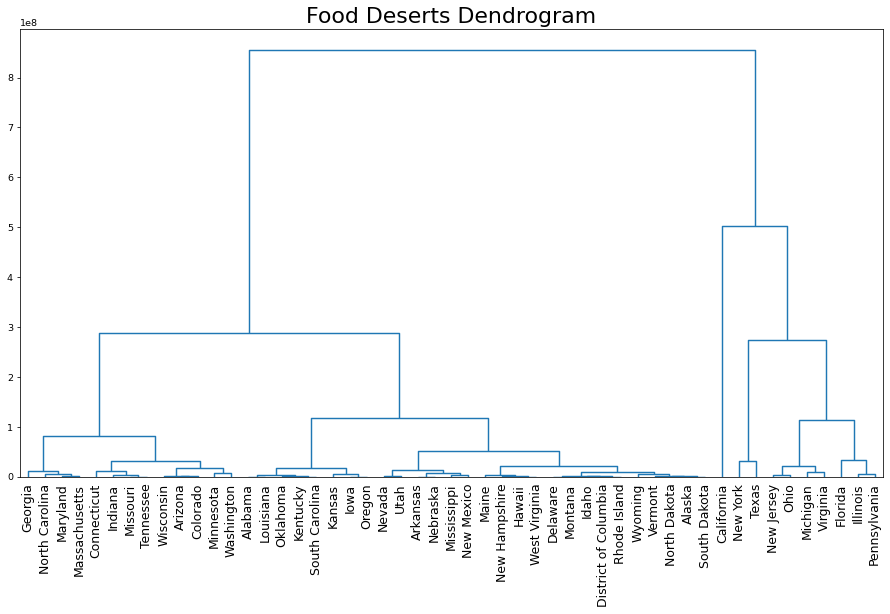

In [50]:
#Dendrogram - Median Family Incomes correlated with Portion of population in food deserts for each state


# Plot
plt.figure(figsize=(13, 9), dpi= 69)  
plt.title("Food Deserts Dendrogram", fontsize=23)  
dend = shc.dendrogram(shc.linkage(desertdf5[['MedianFamilyIncome','Desert vs POP']], method='ward'), labels=desertdf5.State.values, color_threshold=100)  
plt.xticks(fontsize=13)
plt.tight_layout()
#plt.savefig("./dendro1.png",facecolor='w')
plt.show()

<Figure size 1280x800 with 0 Axes>

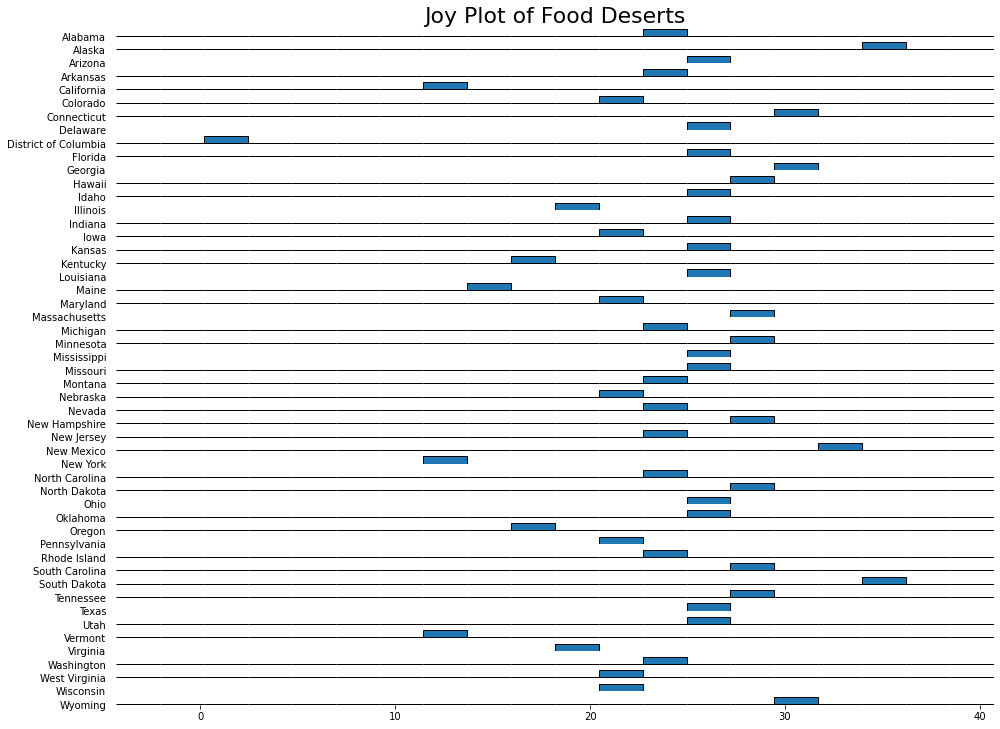

In [54]:
# Draw joy Plot of all desert populations
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(desertdf5, column=['Desert vs POP'], by="State", hist="True", bins=20, overlap=0,legend=False, figsize=(14,10))

# Decoration
plt.title('Joy Plot of Food Deserts', fontsize=22)
plt.show()

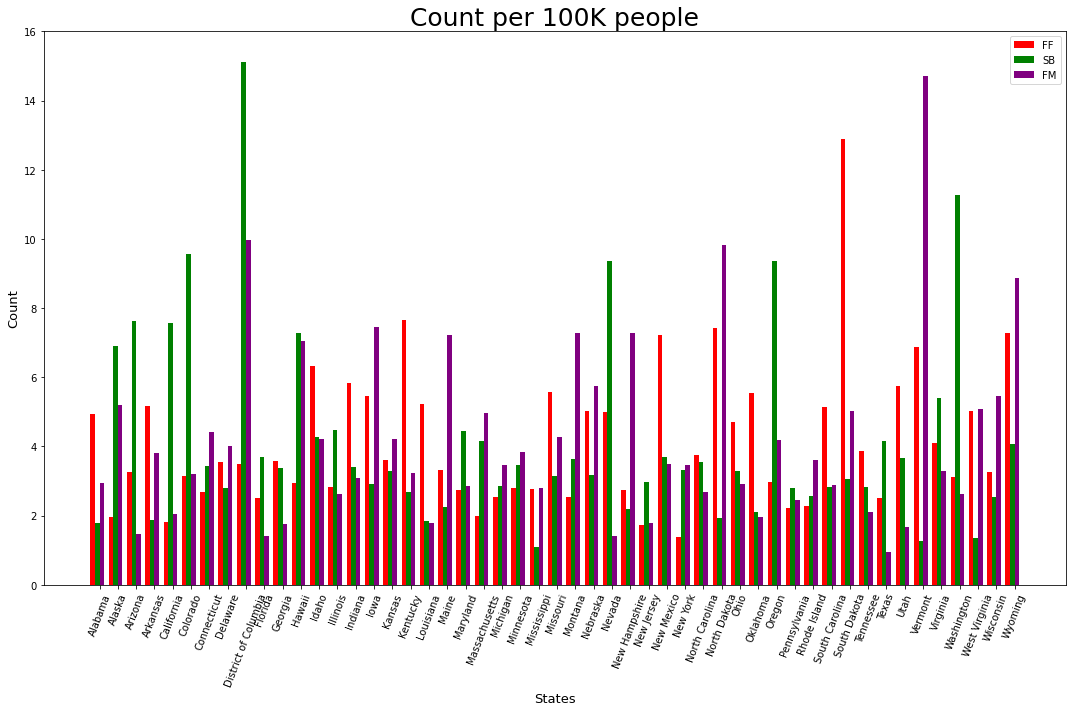

In [126]:
#Bar chart showing the comparison for Fast Food location, Starbucks locations, and farmers markets per 100K people in each state

length = len(counts2)
x_labels = counts2['State']


# Set plot parameters
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.25 # width of bar
x = np.arange(length)

ax.bar(x, counts2['FFpt'], width, color='red', label='FF')
ax.bar(x + width, counts2['SBpt'], width, color='green', label='SB')
ax.bar(x + (2 * width), counts2['FMpt'], width, color='purple', label='FM')


ax.set_ylabel('Metric')
ax.set_ylim(0,16)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
#ax.set_xlabel('Scenario')
ax.set_title('Title')
ax.legend()
plt.xticks(rotation=69)
# Set labels for axes
plt.xlabel("States",fontsize = 13)
plt.ylabel("Count",fontsize = 13)
plt.title("Count per 100K people",fontsize=25,ha='center')
plt.tight_layout()

#plt.savefig("./Counts1.png",facecolor='w')
# plt.savefig("../Images/Mice.png", bbox_inches = "tight")
plt.show()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

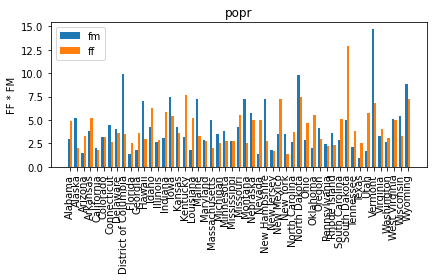

In [128]:
labels = counts2['State']
fm = counts2['FMpt']
sb = counts2['SBpt']
ff = counts2['FFpt']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fm, width, label='fm')
rects2 = ax.bar(x + width/2, ff, width, label='ff')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('FF * FM')
ax.set_title('popr')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()




fig.tight_layout()

plt.show()

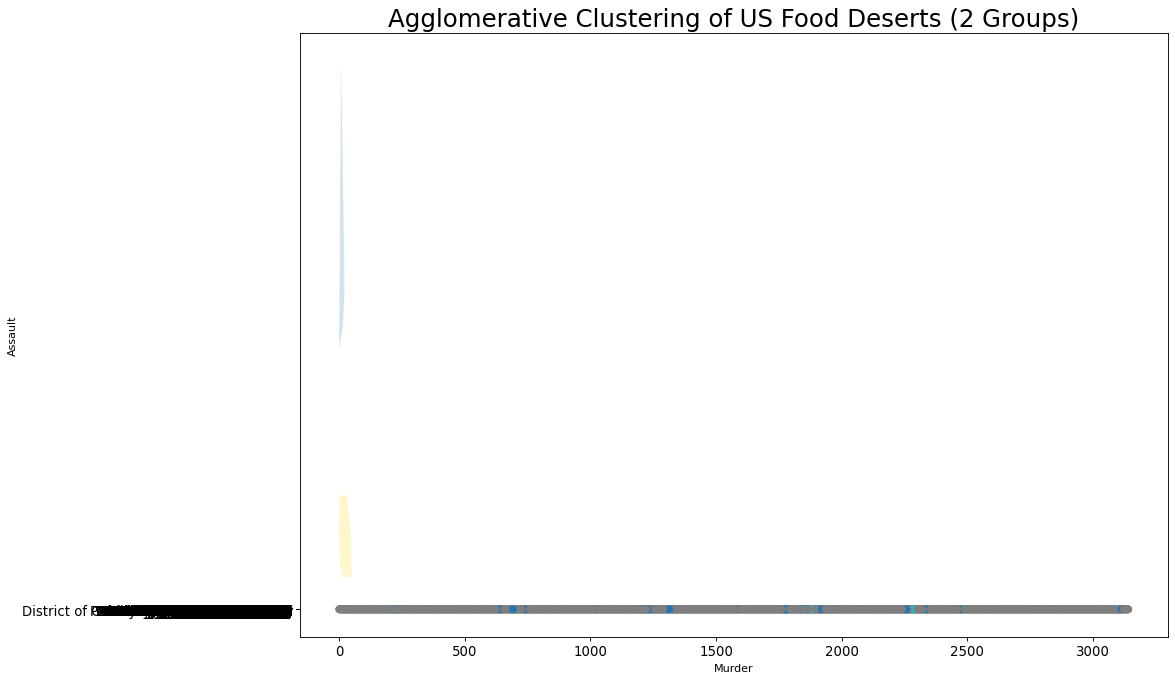

In [125]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(desertdf5[['Desert vs POP','MedianFamilyIncome']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(desertdf5.iloc[:,0], desertdf5.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(desertdf5.loc[cluster.labels_ == 0, 'Desert vs POP'], desertdf5.loc[cluster.labels_ == 0, 'MedianFamilyIncome'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(desertdf5.loc[cluster.labels_ == 1, 'Desert vs POP'], desertdf5.loc[cluster.labels_ == 1, 'MedianFamilyIncome'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of US Food Deserts (2 Groups)', fontsize=22)
plt.show()

In [ ]:
#sizes = [10, 40, 70, 100, 130] 
marker_size = pd.cut(5*counts2['POP2010'], [0, 250000, 500000, 1000000, 2000000, 5000000, 10000000]) 
sns.lmplot('FFpt', 'POP2010', data=counts2, hue='State', fit_reg=False, scatter_kws={'s':marker_size})
plt.ylim((0, 500000))

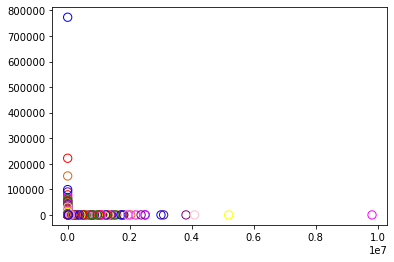

In [90]:
plt.scatter(counts2['POP2010'],counts2['FFpt'],s=69, color='purple',marker="o",facecolors='none',edgecolors=colors)

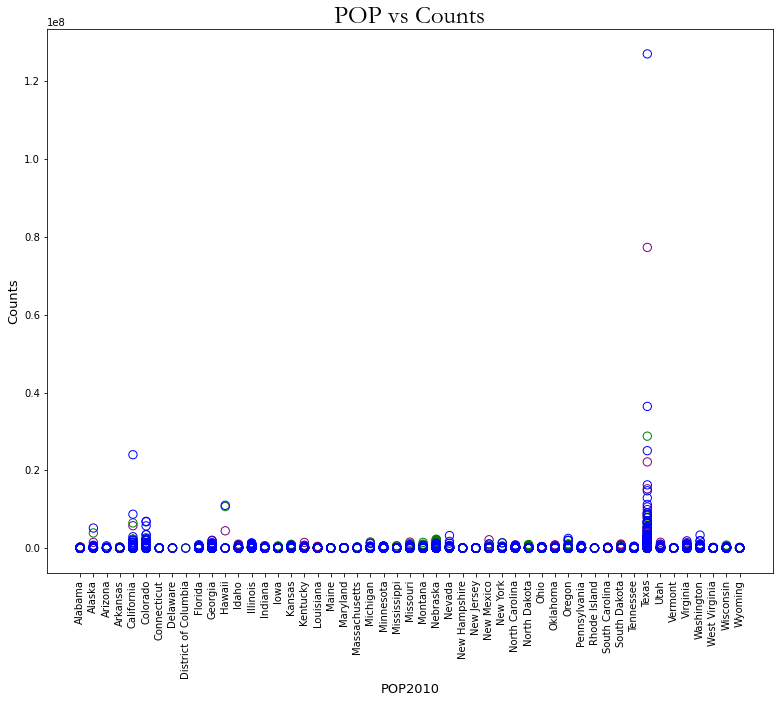

In [89]:

fig2, ax2 = plt.subplots(figsize=(13, 10))
colors = ["chocolate","magenta","pink","violet","blue","indigo","purple","red","brown","yellow","green"]
plt.scatter(counts2['State'],counts2['FFpt']*100,s=69, color='purple',marker="o",facecolors='none',edgecolors='purple')
plt.scatter(counts2['State'],counts2['FMpt']*100,s=69, color='purple',marker="o",facecolors='none',edgecolors='green')
plt.scatter(counts2['State'],counts2['SBpt']*100,s=69, color='purple',marker="o",facecolors='none',edgecolors='blue')
plt.title('POP vs Counts',font='Garamond',fontsize =25)
plt.xlabel('POP2010',fontsize =13)
plt.ylabel('Counts',fontsize =13)
plt.xticks(rotation=90)

#plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

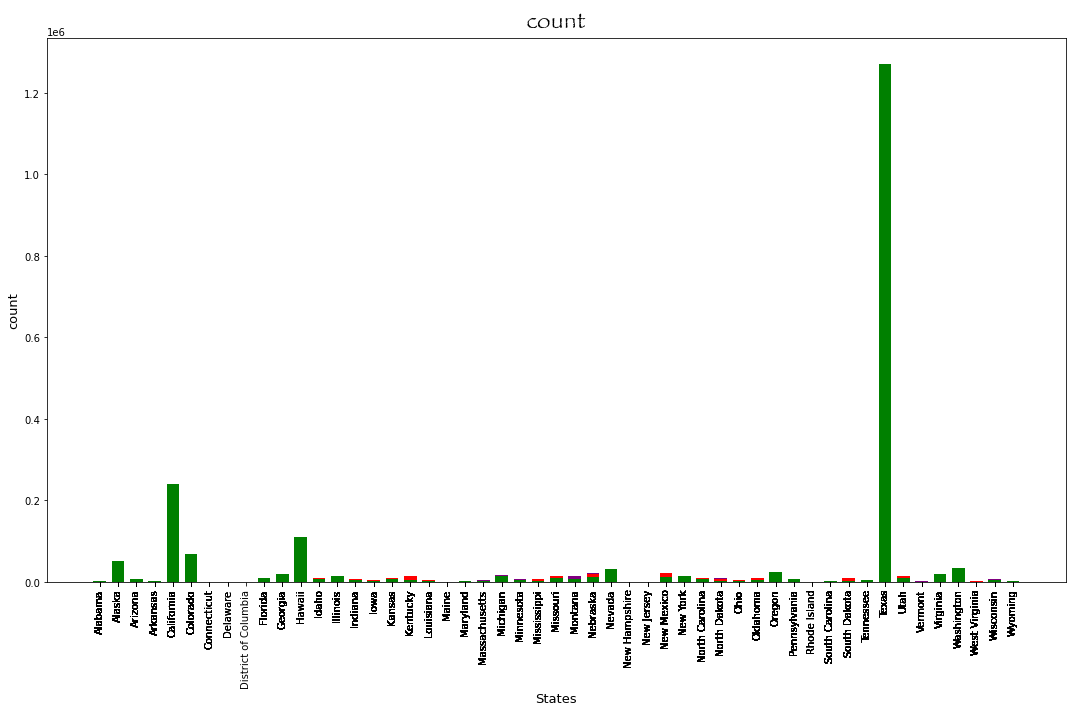

In [92]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set the x_axis 
#x_axis = np.arange(len(totalmeasures))
fig2, ax2 = plt.subplots(figsize=(15, 10))
colors = ["chocolate","magenta","pink","violet","blue","indigo","purple","red","brown","yellow","green"]
plt.bar(counts2['State'], counts2['FMpt'], width = 0.69, color='purple')
plt.bar(counts2['State'], counts2['FFpt'], width = 0.69, color='red')
plt.bar(counts2['State'], counts2['SBpt'], width = 0.69, color='green')


# tick marks
ticks = counts2['State']
plt.xticks(ticks,rotation=90)
# Set labels for axes
plt.xlabel("States",fontsize = 13)
plt.ylabel("count",fontsize = 13)
plt.title("count",font='Papyrus',fontsize=25,ha='center')
plt.tight_layout()

# plt.savefig("../Images/Mice.png", bbox_inches = "tight")
plt.show()

<AxesSubplot:xlabel='State'>

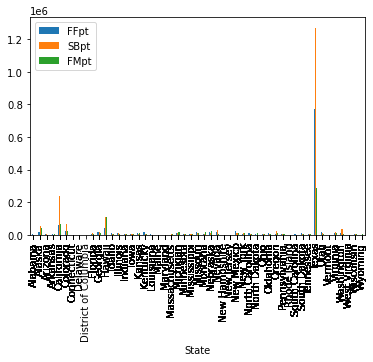

In [94]:
counts4.plot(kind='bar')

<ipython-input-95-2dd63053f0fe>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


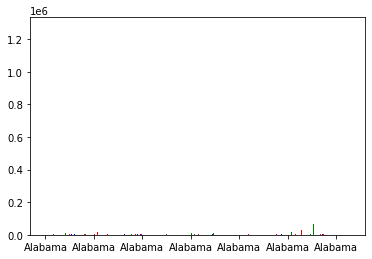

In [95]:
labels = counts2['State']
fm = counts2['FMpt']
sb = counts2['SBpt']
ff = counts2['FFpt']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


ax = plt.subplot(111)
ax.bar(x-0.2, fm, width=0.2, color='b', align='center')
ax.bar(x, sb, width=0.2, color='g', align='center')
ax.bar(x+0.2, ff, width=0.2, color='r', align='center')
ax.set_xticklabels(labels)

plt.show()

C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


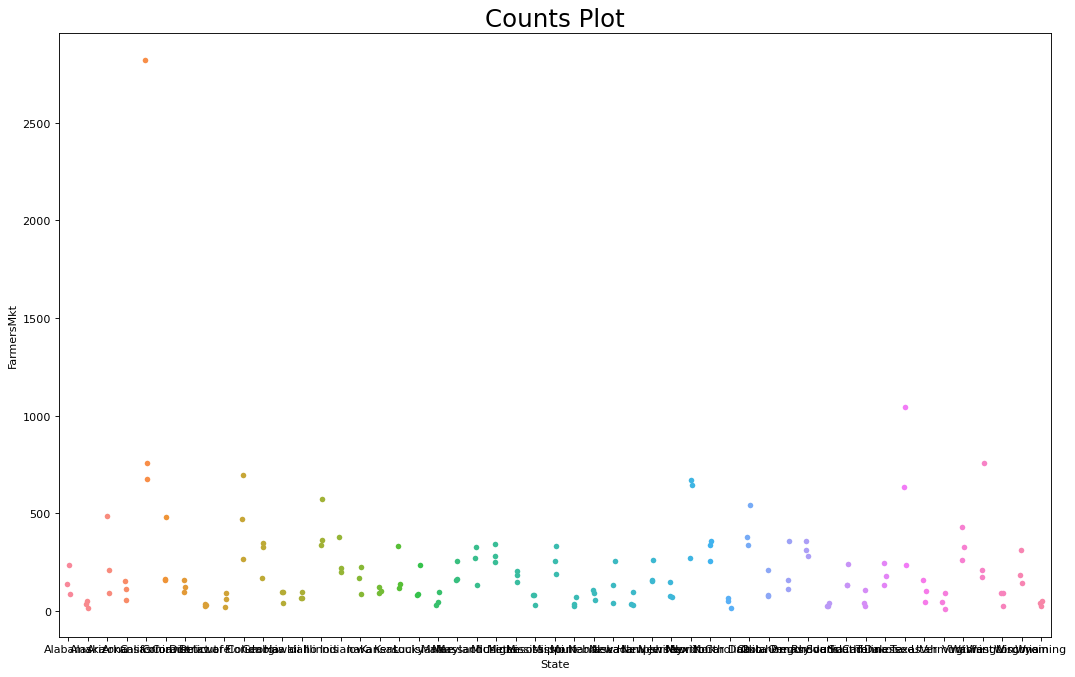

In [80]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(counts1.State, counts1.FastFood, ax=ax)
sns.stripplot(counts1.State, counts1.Sbux, ax=ax)
sns.stripplot(counts1.State, counts1.FarmersMkt, ax=ax)


# Decorations
plt.title('Counts Plot', fontsize=22)
plt.show()

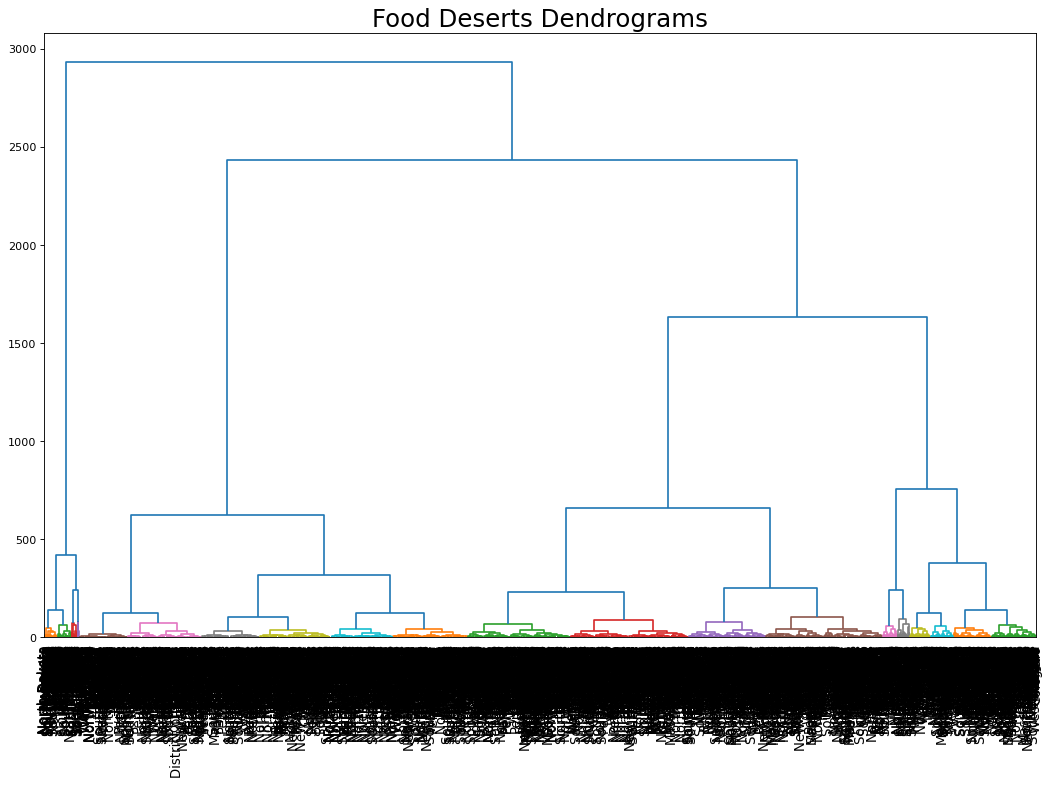

In [47]:
# Plotting dendrogram of all counties
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("Food Deserts Dendrograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(desertdf4[['Desert vs POP','MedianFamilyIncome']], method='ward'), labels=desertdf4.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()